In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#con = r'E:/RESEAERCH/FEEDS/kyebando/kyebandoLonLat.csv'
#con = r'E:/RESEAERCH/FEEDS/BUGOLBI/BUGOLBILonLat.csv'
#con =r'E:/RESEAERCH/FEEDS/makerere/makerereLonLat.csv'
#con =r'E:/RESEAERCH/FEEDS/makidye/makidyeLonLat.csv'
#con =r'E:/RESEAERCH/FEEDS/BUKOTO/BUKOTOLonLat.csv'
#con = r'E:/RESEAERCH/FEEDS/makidye/makidyeDailyAVE2.csv'
#con = r'E:/RESEAERCH/FEEDS/mulago/mulagoTotal1.csv'
#con = r'E:/RESEAERCH/FEEDS/makidye/makidyeTotal1.csv'
con = r'E:/RESEAERCH/FEEDS/bugolbi/bugolbiTotal1.csv'

In [12]:
data = pd.read_csv(con, parse_dates = ['created_at'])
print data.head()

   Unnamed: 0          created_at    pm1  pm2.5   pm10  latitude  longitude
0           0 2018-08-21 17:23:45  20.01  29.43  30.74  0.307242  32.620522
1           1 2018-08-21 17:24:47  13.10  19.63  19.93  0.307258  32.620541
2           2 2018-08-21 17:26:47  10.25  15.75  17.25  0.307241  32.620529
3           3 2018-08-21 17:27:48  14.56  22.52  24.22  0.307271  32.620552
4           4 2018-08-21 17:28:50  14.40  22.11  24.87  0.307256  32.620564


In [13]:
data.describe()

,Unnamed: 0,pm1,pm2.5,pm10,latitude,longitude
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,3999.500000,15.783359,23.097931,25.155470,0.419704,32.728549
std,2309.415493,15.584753,21.917024,24.005588,10.602813,10.261401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.750000,5.410000,8.660000,9.550000,0.307218,32.620510
50%,3999.500000,10.110000,15.800000,17.340000,0.307245,32.620537
75%,5999.250000,21.450000,32.260000,35.360000,0.307273,32.620556
max,7999.000000,203.510000,412.860000,582.910000,1000.000000,1000.000000


In [6]:
data['pm2.5'].var()

456.2969806376597

In [7]:
data['pm2.5'].median()

16.09

In [8]:
#x=data['pm2.5'].count()
pm = data['field2']
date = data['created_at']

In [14]:
date = data['created_at']
pm = data['pm2.5']
#print pm
data2 = pd.DataFrame({'date': data['created_at'],
                     'PM25':data['pm2.5'] })
#print data.head()
#PRINT Dailly average data
daily = data2.set_index('date').groupby(pd.Grouper(freq='H'))['PM25'].mean()
monthly = daily.groupby(pd.Grouper(freq='H')).mean()
monthlys = monthly.dropna(axis=0)
print monthlys
print monthlys.shape

date
2018-08-21 17:00:00     23.714000
2018-08-21 18:00:00     19.660000
2018-08-21 19:00:00     22.729455
2018-08-21 20:00:00     23.084727
2018-08-21 21:00:00     26.610566
2018-08-21 22:00:00     28.668824
2018-08-21 23:00:00     30.161404
2018-08-22 00:00:00     25.310784
2018-08-22 01:00:00     27.773929
2018-08-22 02:00:00     21.575862
2018-08-22 03:00:00     21.757091
2018-08-22 04:00:00     22.009434
2018-08-22 05:00:00     24.757736
2018-08-22 06:00:00     30.917200
2018-08-22 07:00:00     29.251636
2018-08-22 08:00:00     28.678000
2018-08-22 09:00:00     23.924762
2018-08-22 10:00:00     25.233654
2018-08-22 11:00:00     26.456744
2018-08-22 12:00:00     25.141622
2018-08-22 13:00:00     21.140000
2018-08-22 14:00:00     26.593261
2018-08-22 15:00:00     24.481321
2018-08-22 16:00:00     24.012200
2018-08-22 17:00:00     22.756545
2018-08-22 18:00:00     22.308596
2018-08-22 19:00:00     18.214468
2018-08-22 20:00:00     16.538909
2018-08-22 21:00:00     14.170179
2018-08-2

In [17]:
monthlys.describe()

count    37.000000
mean      7.276653
std       4.510582
min       0.731254
25%       3.971436
50%       7.799451
75%       9.977462
max      20.526977
Name: PM25, dtype: float64

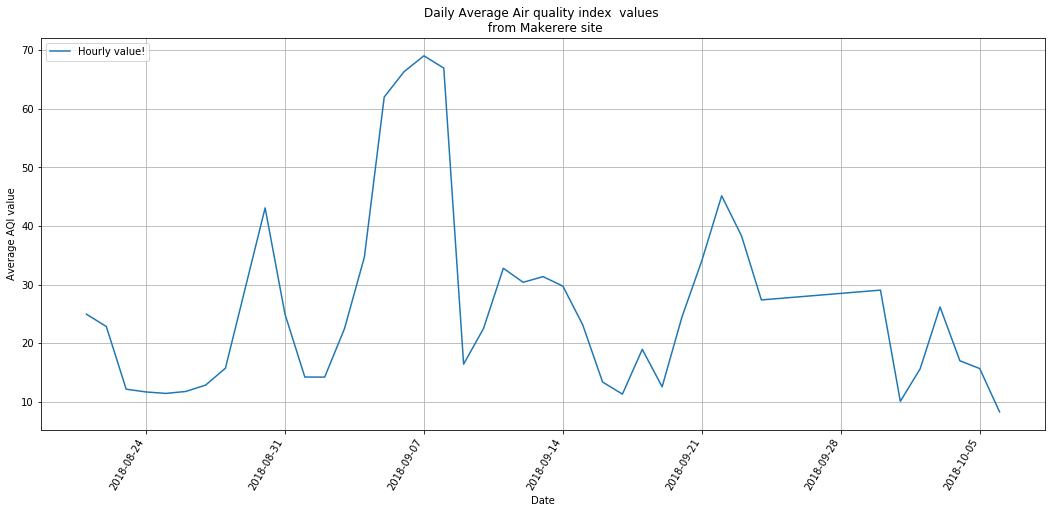

In [11]:
fig, ax = plt.subplots(figsize=(18,8))
ax = monthlys.plot(kind='line',label='Hourly value!')
plt.legend(loc=2)
plt.xticks(rotation=60)
plt.grid()
plt.grid(which='minor')
plt.title('Daily Average Air quality index  values \n from Makerere site')
plt.xlabel('Date')
plt.ylabel('Average AQI value')
plt.show()

In [16]:
monthlys.to_csv('E:/RESEAERCH/FEEDS/bugolbi/bugolbiHourlyAVE.csv')


In [2]:
fo1=r'E:/RESEAERCH/FEEDS/MukBugos.csv'

In [9]:
dat = pd.read_csv(fo1)
dat.head()

,day,date,Bugolobi,Makerere,Makindye,Mulago
0,1,11/08/2018,NaN,NaN,NaN,15.061452
1,2,12/08/2018,NaN,NaN,NaN,7.978928
2,3,13/08/2018,NaN,NaN,NaN,7.356737
3,4,14/08/2018,NaN,NaN,NaN,19.494723
4,5,15/08/2018,NaN,NaN,29.588337,16.372731


In [17]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
day         45 non-null int64
date        45 non-null object
Bugolobi    34 non-null float64
Makerere    28 non-null float64
Makindye    35 non-null float64
Mulago      20 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ KB


In [18]:
dat['Makerere'].corr(dat['Bugolobi'])

0.021917637988104345

In [25]:
#dat.corr(method='spearman')
dat.drop(['day'], axis=1).corr(method='spearman')

,Bugolobi,Makerere,Makindye,Mulago
Bugolobi,1.000000,-0.157607,0.248167,-0.600000
Makerere,-0.157607,1.000000,0.275336,0.357143
Makindye,0.248167,0.275336,1.000000,0.539394
Mulago,-0.600000,0.357143,0.539394,1.000000


In [27]:
#dat.corr(method='pearson')
dat.drop(['day'], axis=1).corr(method='pearson')

,Bugolobi,Makerere,Makindye,Mulago
Bugolobi,1.000000,0.021918,0.411141,-0.578438
Makerere,0.021918,1.000000,0.299609,0.477741
Makindye,0.411141,0.299609,1.000000,0.244948
Mulago,-0.578438,0.477741,0.244948,1.000000


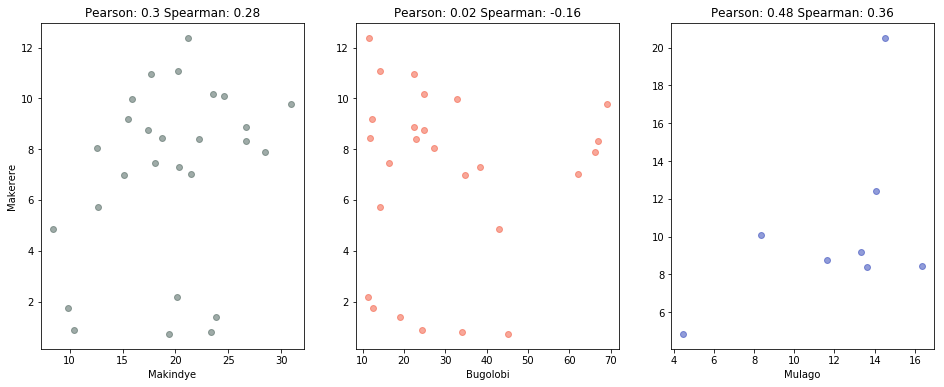

In [32]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Makindye', 'Bugolobi', 'Mulago']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Makerere')
    i.scatter(dat[cols[j]], dat['Makerere'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%dat.corr().loc[cols[j]]['Makerere'].round(2)+' Spearman: %s'%dat.corr(method='spearman').loc[cols[j]]['Makerere'].round(2))
    j+=1

plt.show()

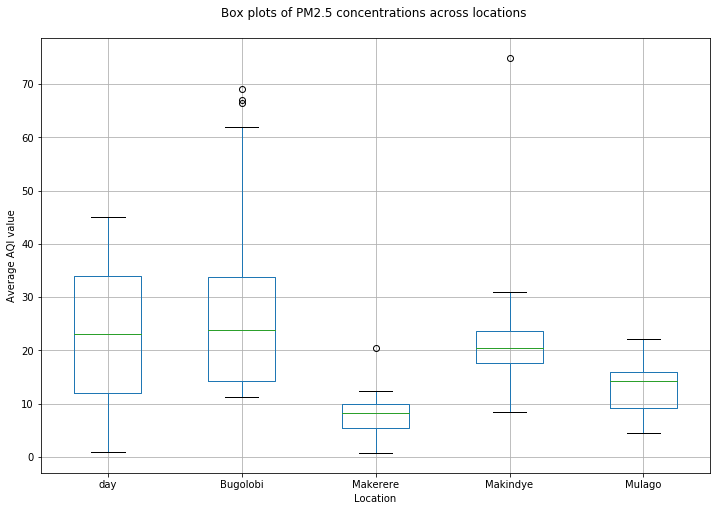

In [4]:
#dat.boxplot()
dat.boxplot(figsize=(12,8))
plt.title('Box plots of PM2.5 concentrations across locations \n')
plt.xlabel('Location')
plt.ylabel('Average AQI value')
plt.show()

In [6]:
dat.corr()

,day,Bugolobi,Makerere,Makindye,Mulago
day,1.000000,0.198068,-0.683149,-0.368830,-0.159370
Bugolobi,0.198068,1.000000,0.021918,0.411141,-0.578438
Makerere,-0.683149,0.021918,1.000000,0.299609,0.477741
Makindye,-0.368830,0.411141,0.299609,1.000000,0.244948
Mulago,-0.159370,-0.578438,0.477741,0.244948,1.000000


In [8]:
data1 = np.genfromtxt(fo1,  delimiter=',', skip_header=1)
#print data1
x1 = data1[:,[2]]
y1 = data1[:,[3]]
#print x

In [61]:
xq= dat['date']
yq = dat['Bugolobi']
yq1= dat['Makerere']
yq2 = dat['Makindye']
xq3 = dat['Mulago']
xq = sorted(xq)

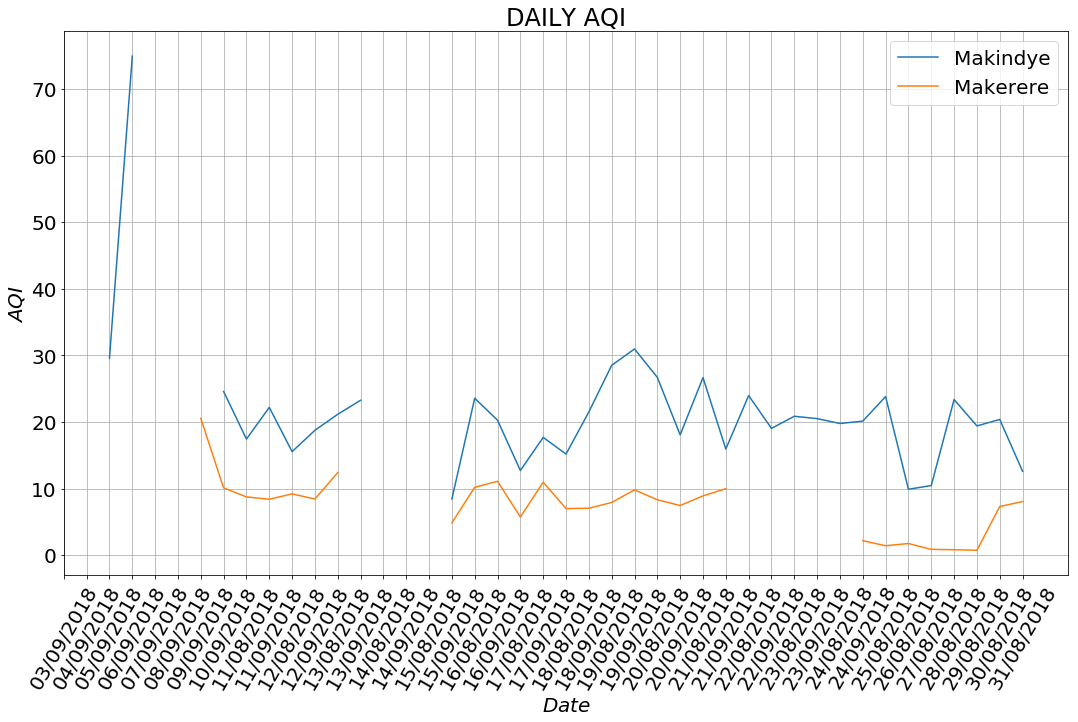

In [64]:
#creat a figure
fig_noise_free = plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 20})
#mark the observations
#plt.bar(x,y1,label='Bukoto')
#plt.plot(xq,yq,label='Bugolobi')
#plt.plot(xq,xq3, label= 'Mulago')
plt.plot(xq,yq2, label='Makindye')
plt.plot(xq,yq1,label='Makerere')
#plt.bar(x,y4,label='Mulago')
#plt.bar(x,y5,label='Makindye')
#plt.plot(X_test,f_mean,'b-', label='main function')
plt.xlabel('$Date$')
plt.ylabel('$AQI$')
plt.xticks(rotation=60)
plt.legend()
plt.grid()
plt.title('DAILY AQI')
plt.show()

In [32]:
foo2 =r'E:/RESEAERCH/FEEDS/datedayCOMBO.csv'
dat2 = pd.read_csv(foo2, parse_dates = ['Date'])
dat2.head()

,Date,Bukoto,Bugolobi,Kyebando,Makerere,Makindye,Mulago
0,2018-12-06,NaN,NaN,12.959416,NaN,NaN,NaN
1,2018-06-18,NaN,NaN,22.822465,NaN,NaN,NaN
2,2018-06-19,NaN,NaN,39.901711,NaN,NaN,NaN
3,2018-06-20,NaN,NaN,28.892166,NaN,NaN,NaN
4,2018-06-21,NaN,NaN,41.692591,NaN,NaN,NaN


In [33]:
dat2.corr()

,Bukoto,Bugolobi,Kyebando,Makerere,Makindye,Mulago
Bukoto,1.000000,-0.251611,0.360929,0.888990,-0.005319,0.288308
Bugolobi,-0.251611,1.000000,-0.073724,0.021918,0.411141,-0.578438
Kyebando,0.360929,-0.073724,1.000000,0.705311,0.351550,0.705498
Makerere,0.888990,0.021918,0.705311,1.000000,0.299609,0.477741
Makindye,-0.005319,0.411141,0.351550,0.299609,1.000000,0.244948
Mulago,0.288308,-0.578438,0.705498,0.477741,0.244948,1.000000


In [37]:
x = dat2['Date']
x = sorted(x)
y1 =dat2['Bukoto']
y2 = dat2['Bugolobi']
y3= dat2['Makerere']
y4= dat2['Mulago']
y5= dat2['Makindye']

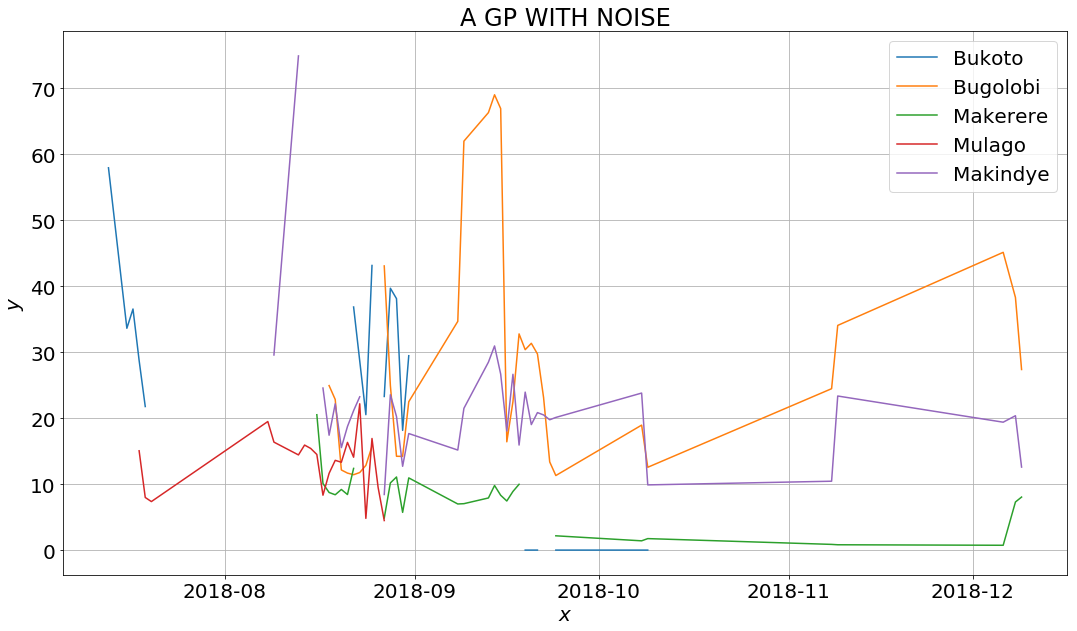

In [39]:
#creat a figure
fig_noise_free = plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 20})
#mark the observations
plt.plot(x,y1,label='Bukoto')
plt.plot(x,y2,label='Bugolobi')
plt.plot(x,y3,label='Makerere')
plt.plot(x,y4,label='Mulago')
plt.plot(x,y5,label='Makindye')
#plt.plot(X_test,f_mean,'b-', label='main function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.title('A GP WITH NOISE')
plt.show()

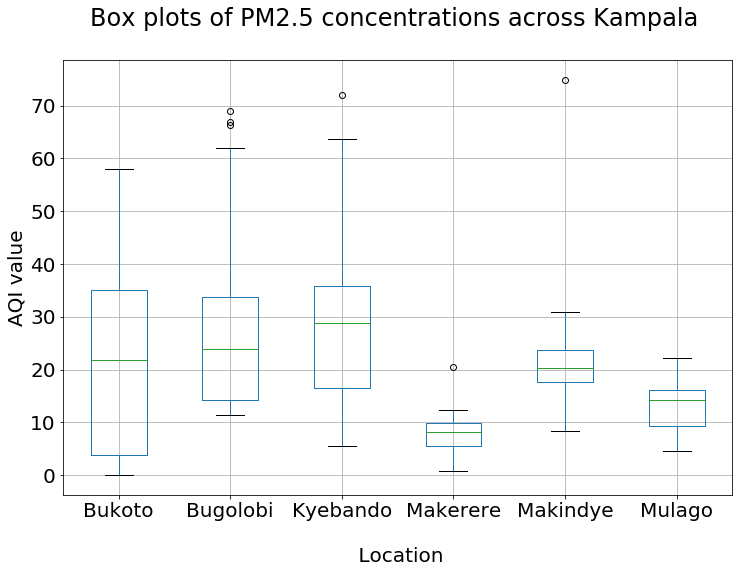

In [46]:
dat2.boxplot(figsize=(12,8))
plt.title('Box plots of PM2.5 concentrations across Kampala \n')
plt.xlabel('\n Location')
plt.ylabel('AQI value')
plt.show()

In [30]:
do = r'E:/RESEAERCH/FEEDS/HOURLYCOMBO.csv'
dat3 = pd.read_csv(do)
dat3.head()

,BUGOLOBI,BUKOTO,KYEBANDO,MAKERERE,MAKINDYE,MULAGO
0,29.43,31.20,12.60,31.48,49.77,12.51
1,19.63,30.46,13.17,29.27,46.37,11.90
2,15.75,32.57,13.05,27.54,45.47,11.06
3,22.52,34.42,11.62,26.96,42.66,12.56
4,22.11,34.19,8.28,26.30,39.33,12.57


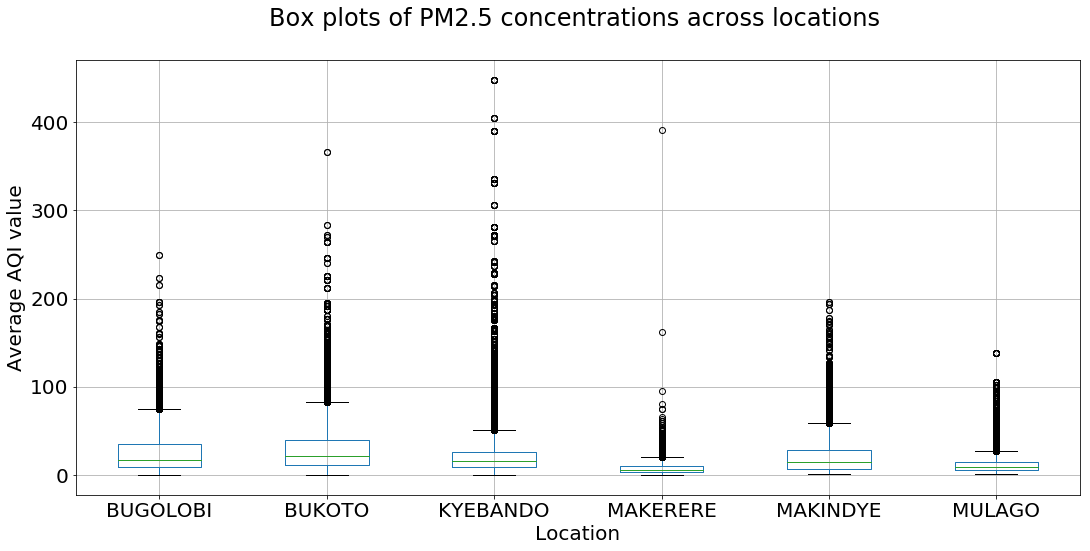

In [45]:
dat3.boxplot(figsize=(18,8))
plt.title('Box plots of PM2.5 concentrations across locations \n')
plt.xlabel('Location')
plt.ylabel('Average AQI value')
plt.show()

In [31]:
dat3.corr()

,BUGOLOBI,BUKOTO,KYEBANDO,MAKERERE,MAKINDYE,MULAGO
BUGOLOBI,1.000000,0.036476,-0.031581,-0.088630,-0.018830,-0.025281
BUKOTO,0.036476,1.000000,0.051737,0.089774,0.032406,-0.043334
KYEBANDO,-0.031581,0.051737,1.000000,0.000130,0.019957,-0.026469
MAKERERE,-0.088630,0.089774,0.000130,1.000000,0.011126,-0.014500
MAKINDYE,-0.018830,0.032406,0.019957,0.011126,1.000000,-0.103594
MULAGO,-0.025281,-0.043334,-0.026469,-0.014500,-0.103594,1.000000
